In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

import numpy as np
from sort_src.flow import FlowData
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cmap import Colormap
from sort_src.pydscatter import dscatter_plot, dscatter_contour
from collections import defaultdict
from sort_src.fold_utils import get_all_metrics, plot_structure

## Flow Cytometry data loading and processing

In [3]:
def load_mammalian_samples(fname_dict, gate_paths):

    # load FACS data and gates
    expt = {}
    for i in tqdm(fname_dict):
        flow = FlowData(fname_dict[i], i)
        for gate in gate_paths:
            flow.load_gate(gate)
        expt[i] = flow

    return(expt)

In [4]:
# N2a Rep 1
pth = '../data/fcs/mammalian/'
gates  = [pth + 'N2a_rep1_fsca_ssca.gate',
          pth + 'N2a_rep1_fsca_fsch.gate',
          pth + 'N2a_rep1_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'N2a_rep1_Neon_DEL.fcs',
           'stem':      pth + 'N2a_rep1_1.fcs',
           'point1':    pth + 'N2a_rep1_2.fcs',
           'point2':    pth + 'N2a_rep1_3.fcs',
           'destab':    pth + 'N2a_rep1_4.fcs',
           'unstruc':   pth + 'N2a_rep1_5.fcs',
           'iHbb':      pth + 'N2a_rep1_wt.fcs',
           'mScar_DEL': pth + 'N2a_rep1_Scarlet_DEL.fcs'}
n2a_rep1 = load_mammalian_samples(samples, gates)

# N2a Rep 2
gates  = [pth + 'N2a_rep2_fsca_ssca.gate',
          pth + 'N2a_rep2_fsca_fsch.gate',
          pth + 'N2a_rep2_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'N2a_rep2_Neon_DEL.fcs',
           'stem':      pth + 'N2a_rep2_1.fcs',
           'point1':    pth + 'N2a_rep2_2.fcs',
           'point2':    pth + 'N2a_rep2_3.fcs',
           'destab':    pth + 'N2a_rep2_4.fcs',
           'unstruc':   pth + 'N2a_rep2_5.fcs',
           'iHbb':      pth + 'N2a_rep2_wt.fcs',
           'mScar_DEL': pth + 'N2a_rep2_Scar_DEL.fcs'}
n2a_rep2 = load_mammalian_samples(samples, gates)

# N2a Rep 3
gates  = [pth + 'N2a_rep3_fsca_ssca.gate',
          pth + 'N2a_rep3_fsca_fsch.gate',
          pth + 'N2a_rep3_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'N2a_rep3_Neon_DEL.fcs',
           'stem':      pth + 'N2a_rep3_1.fcs',
           'point1':    pth + 'N2a_rep3_2.fcs',
           'point2':    pth + 'N2a_rep3_3.fcs',
           'destab':    pth + 'N2a_rep3_4.fcs',
           'unstruc':   pth + 'N2a_rep3_5.fcs',
           'iHbb':      pth + 'N2a_rep3_wt.fcs',
           'mScar_DEL': pth + 'N2a_rep3_Scar_DEL.fcs'}
n2a_rep3 = load_mammalian_samples(samples, gates)

# HeLa Rep 1
gates  = [pth + 'HeLa_rep1_fsca_ssca.gate',
          pth + 'HeLa_rep1_fsca_fsch.gate',
          pth + 'HeLa_rep1_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'HeLa_rep1_Neon_DEL.fcs',
           'stem':      pth + 'HeLa_rep1_1.fcs',
           'point1':    pth + 'HeLa_rep1_2.fcs',
           'point2':    pth + 'HeLa_rep1_3.fcs',
           'destab':    pth + 'HeLa_rep1_4.fcs',
           'unstruc':   pth + 'HeLa_rep1_5.fcs',
           'iHbb':      pth + 'HeLa_rep1_wt.fcs',
           'mScar_DEL': pth + 'HeLa_rep1_Scar_DEL.fcs'}
HeLa_rep1 = load_mammalian_samples(samples, gates)

# HeLa Rep 2
gates  = [pth + 'HeLa_rep2_fsca_ssca.gate',
          pth + 'HeLa_rep2_fsca_fsch.gate',
          pth + 'HeLa_rep2_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'HeLa_rep2_Neon_DEL.fcs',
           'stem':      pth + 'HeLa_rep2_1.fcs',
           'point1':    pth + 'HeLa_rep2_2.fcs',
           'point2':    pth + 'HeLa_rep2_3.fcs',
           'destab':    pth + 'HeLa_rep2_4.fcs',
           'unstruc':   pth + 'HeLa_rep2_5.fcs',
           'iHbb':      pth + 'HeLa_rep2_wt.fcs',
           'mScar_DEL': pth + 'HeLa_rep2_Scar_DEL.fcs'}
HeLa_rep2 = load_mammalian_samples(samples, gates)

# HeLa Rep 3
gates  = [pth + 'HeLa_rep3_fsca_ssca.gate',
          pth + 'HeLa_rep3_fsca_fsch.gate',
          pth + 'HeLa_rep3_ssca_ssch.gate']
samples = {'mNeon_DEL': pth + 'HeLa_rep3_Neon_DEL.fcs',
           'stem':      pth + 'HeLa_rep3_1.fcs',
           'point1':    pth + 'HeLa_rep3_2.fcs',
           'point2':    pth + 'HeLa_rep3_3.fcs',
           'destab':    pth + 'HeLa_rep3_4.fcs',
           'unstruc':   pth + 'HeLa_rep3_5.fcs',
           'iHbb':      pth + 'HeLa_rep3_wt.fcs',
           'mScar_DEL': pth + 'HeLa_rep3_Scar_DEL.fcs'}
HeLa_rep3 = load_mammalian_samples(samples, gates)

100%|██████████| 8/8 [00:00<00:00,  9.00it/s]


In [5]:
def apply_comp(x, comp):
    comp_red = x.data['PE-A'] - comp[0]* x.data['FITC-A']
    comp_gre = x.data['FITC-A'] - comp[1]* x.data['PE-A']
    return(comp_red.to_numpy(), comp_gre.to_numpy())

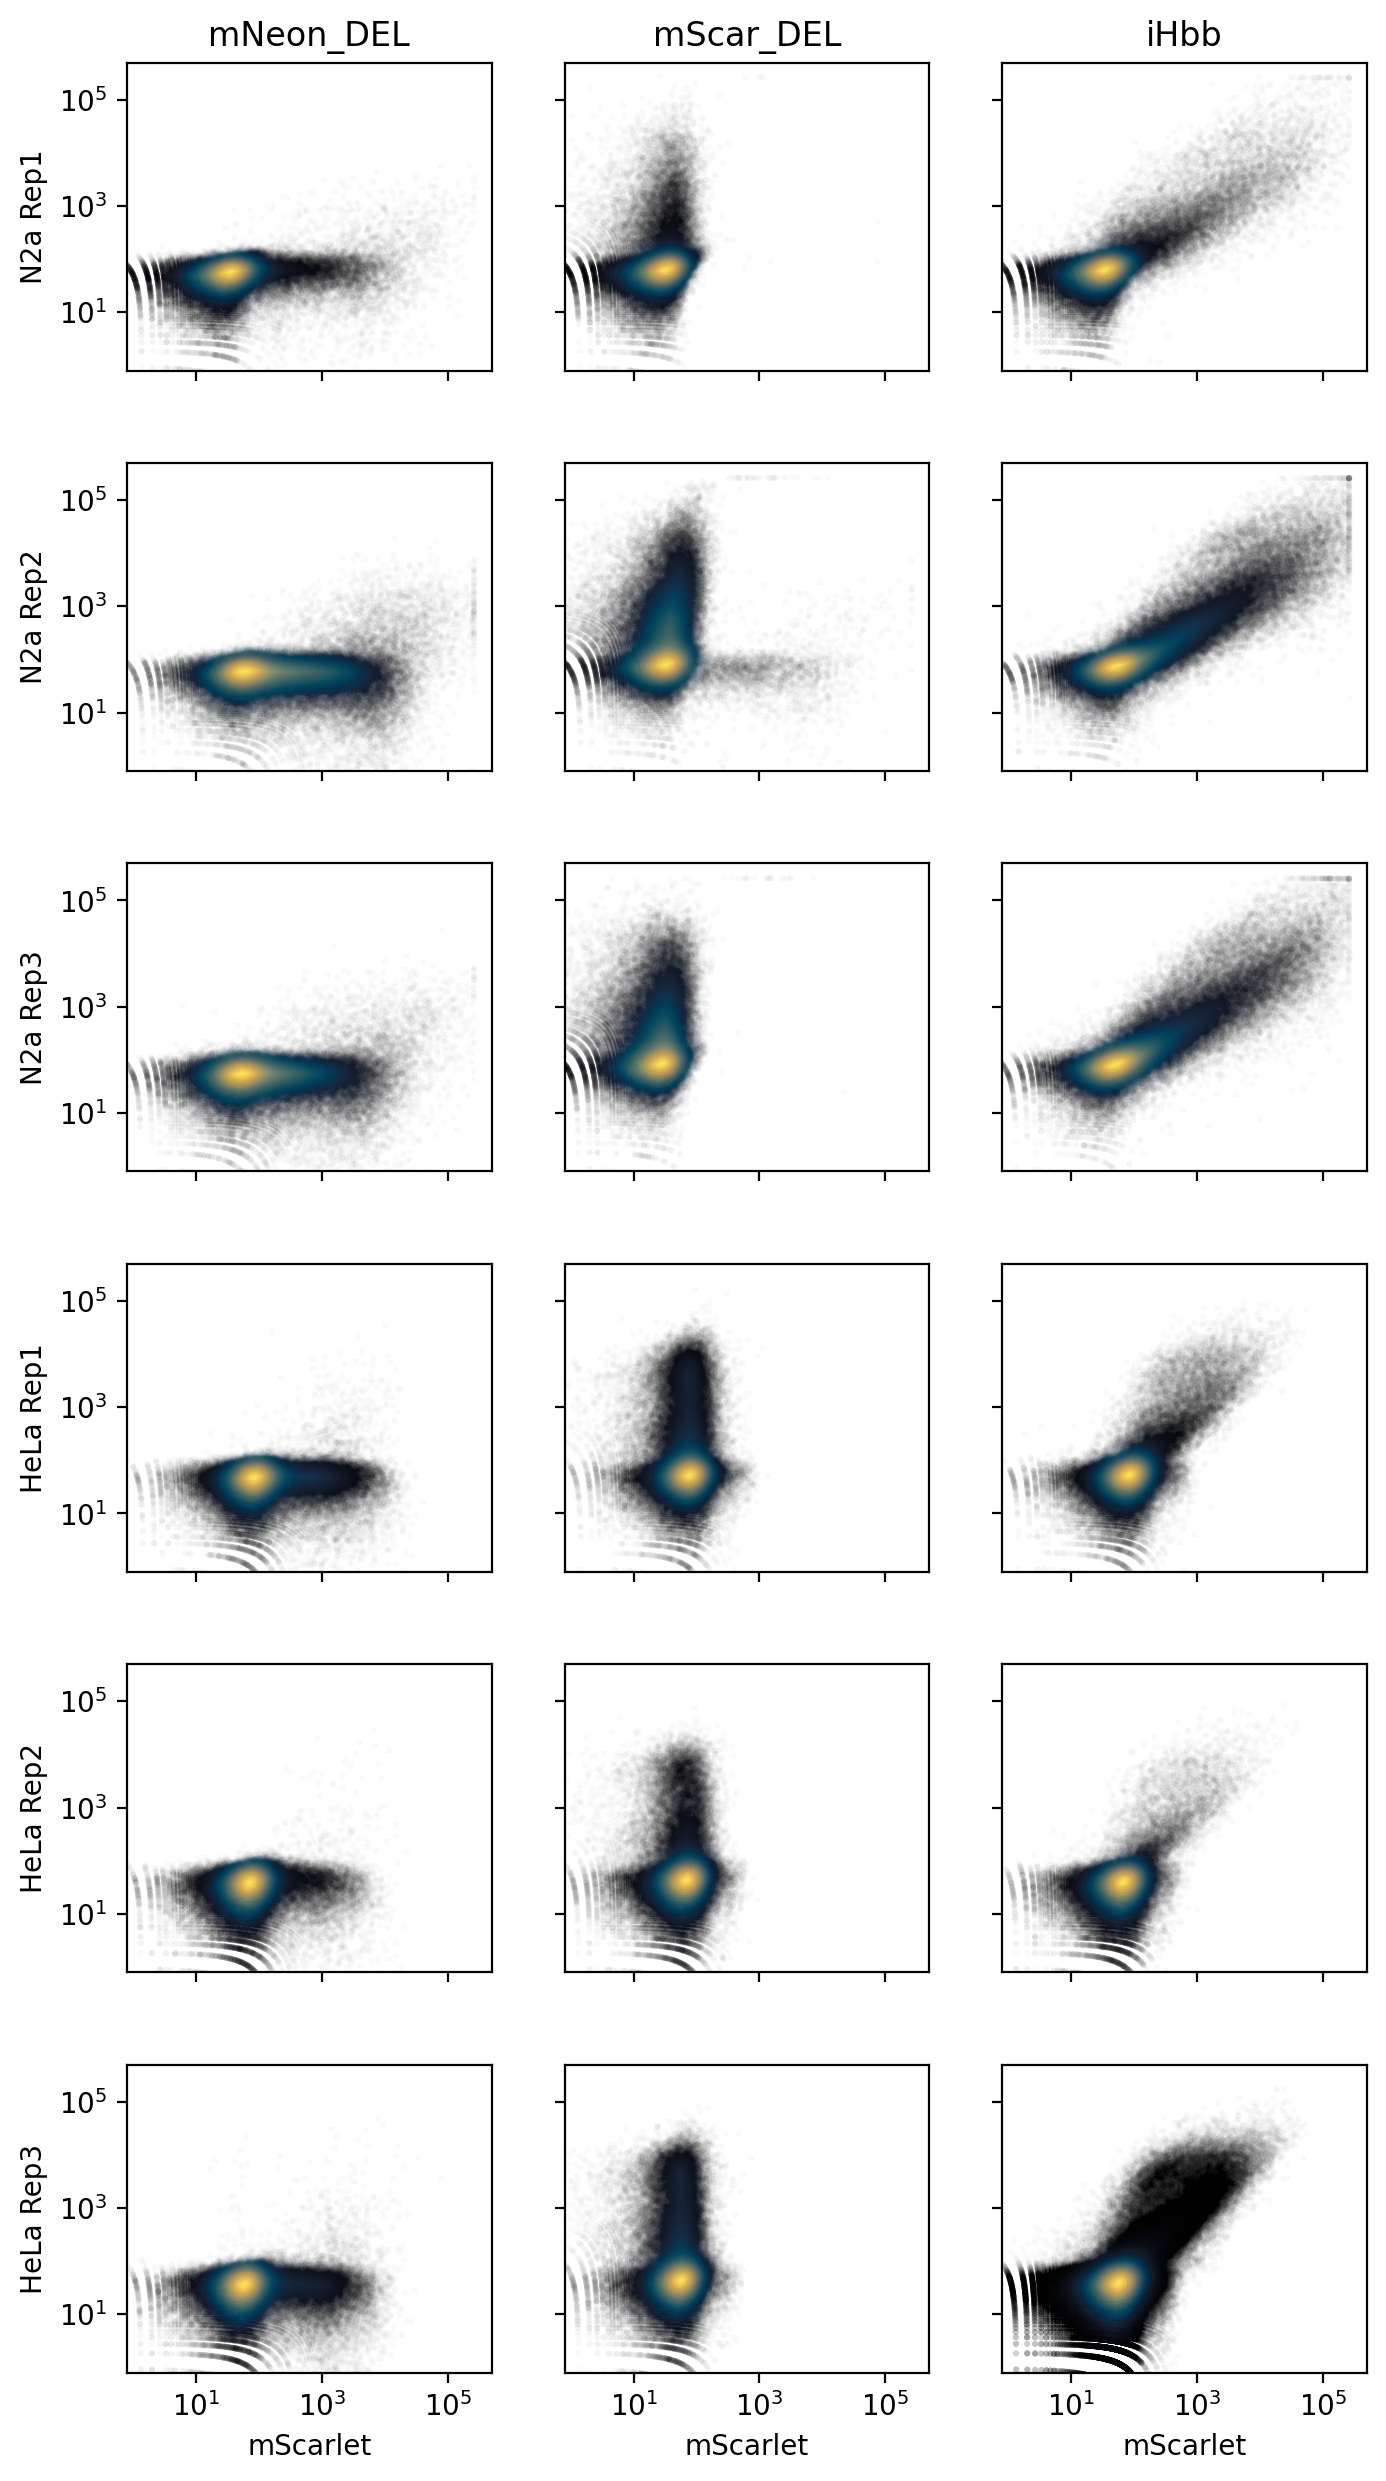

In [6]:
# apply compensation

fig, axs = plt.subplots(6, 3, figsize=[8,15], sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
comp = [[0.0075, 0.014], [0.0075, 0.014], [0.0065, 0.02], [0.006, 0.012], [0.006, 0.012], [0.006, 0.012]]

cmap_sc = Colormap('cmasher:eclipse').to_mpl()

for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3, HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    for j, smp in enumerate(['mNeon_DEL', 'mScar_DEL', 'iHbb']):
        comp_red, comp_gre = apply_comp(expt[smp], comp[i])
        valid_msk = (comp_red>0) & (comp_gre>0) & expt[smp].gate

        dscatter_plot(comp_red[valid_msk], comp_gre[valid_msk], log=[True, True], ax=axs[i, j], cmap=cmap_sc, alpha=0.02, edgecolors='none', rasterized=True)

for i, ax in enumerate(axs[0, :]):
    ax.set_title(['mNeon_DEL', 'mScar_DEL', 'iHbb'][i])
for i, ax in enumerate(axs[-1, :]):
    ax.set_xlabel('mScarlet')

for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(['N2a Rep1', 'N2a Rep2', 'N2a Rep3', 'HeLa Rep1', 'HeLa Rep2', 'HeLa Rep3'][i])

plt.setp(axs, yscale='log', xscale='log', xlim=[0.8, 500000], ylim=[0.8, 500000])
plt.show()


In [7]:
# transfection efficiency
mScar_pos = [2.0, 2.3, 2.1, 2.5, 2.5, 2.3]

for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3, HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    for j, smp in enumerate(expt):
        comp_red, comp_gre = apply_comp(expt[smp], comp[i])
        valid_msk = (comp_red>0) & (comp_gre>0) & expt[smp].gate        
        expt[smp].transf_msk = (np.log10(comp_red)>mScar_pos[i]) & valid_msk

/var/folders/6n/fclyr6_j77n3zhrfxszt4fp00000gn/T/ipykernel_35172/2878386918.py:8: RuntimeWarning: invalid value encountered in log10
  expt[smp].transf_msk = (np.log10(comp_red)>mScar_pos[i]) & valid_msk


## Figure 5b

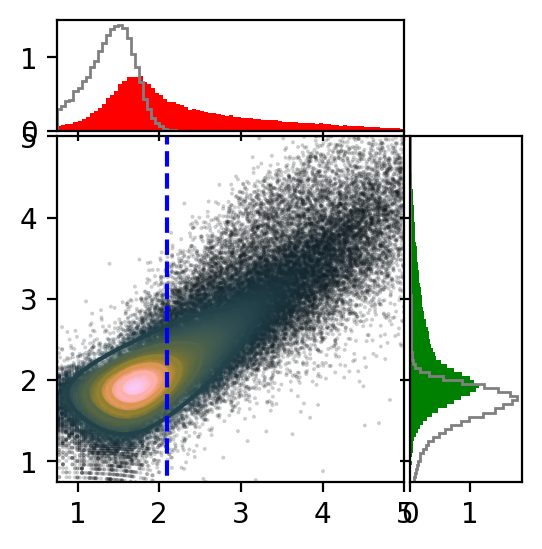

In [8]:
# Set up the figure and the subplots grid
fig = plt.figure(figsize=(3, 3))
gs = gridspec.GridSpec(4, 4, hspace=0.05, wspace=0.05)

# Main scatter plot
ax_main = fig.add_subplot(gs[1:4, 0:3])
# Top histogram
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
# Right histogram
ax_yhist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

cmap_sc = Colormap('batlowk').to_mpl()
cmap_ab = Colormap('cmasher:amber_r').to_mpl()

# iHbb
comp_red, comp_gre = apply_comp(n2a_rep3['iHbb'], comp[2])
valid_msk = (comp_red>0) & (comp_gre>0) & n2a_rep3['iHbb'].gate
dscatter_plot(np.log10(comp_red[valid_msk]), np.log10(comp_gre[valid_msk]), markersize=2, log=[False, False], ax=ax_main, cmap=cmap_sc, alpha=0.2, edgecolors='none', rasterized=True)
dscatter_contour(np.log10(comp_red[valid_msk]), np.log10(comp_gre[valid_msk]), log=[False, False], ax=ax_main, cmap=cmap_sc)
ax_main.plot([2.1, 2.1], [0, 6], '--b')
ax_main.set_xticks([1,2,3,4,5], [1,2,3,4,5])
ax_xhist.hist(np.log10(comp_red[valid_msk]), bins=np.arange(0.75, 5.05, 0.05), color='red', density=True)
ax_yhist.hist(np.log10(comp_gre[valid_msk]), bins=np.arange(0.75, 5.05, 0.05), color='green', orientation='horizontal', density=True)

comp_red, comp_gre = apply_comp(n2a_rep3['mNeon_DEL'], comp[2])
valid_msk = (comp_red>0) & (comp_gre>0) & n2a_rep3['mNeon_DEL'].gate
ax_yhist.hist(np.log10(comp_gre[valid_msk]), bins=np.arange(0.75, 5.05, 0.05), color='gray', orientation='horizontal', histtype='step', density=True)

comp_red, comp_gre = apply_comp(n2a_rep3['mScar_DEL'], comp[2])
valid_msk = (comp_red>0) & (comp_gre>0) & n2a_rep3['mScar_DEL'].gate
ax_xhist.hist(np.log10(comp_red[valid_msk]), bins=np.arange(0.75, 5.05, 0.05), color='gray', histtype='step', density=True)

plt.setp(ax_xhist.get_xticklabels(), visible=False)
plt.setp(ax_yhist.get_yticklabels(), visible=False)
plt.setp(ax_main, xlim=[0.75, 5], ylim=[0.75, 5])

plt.show()

## Figure 5d

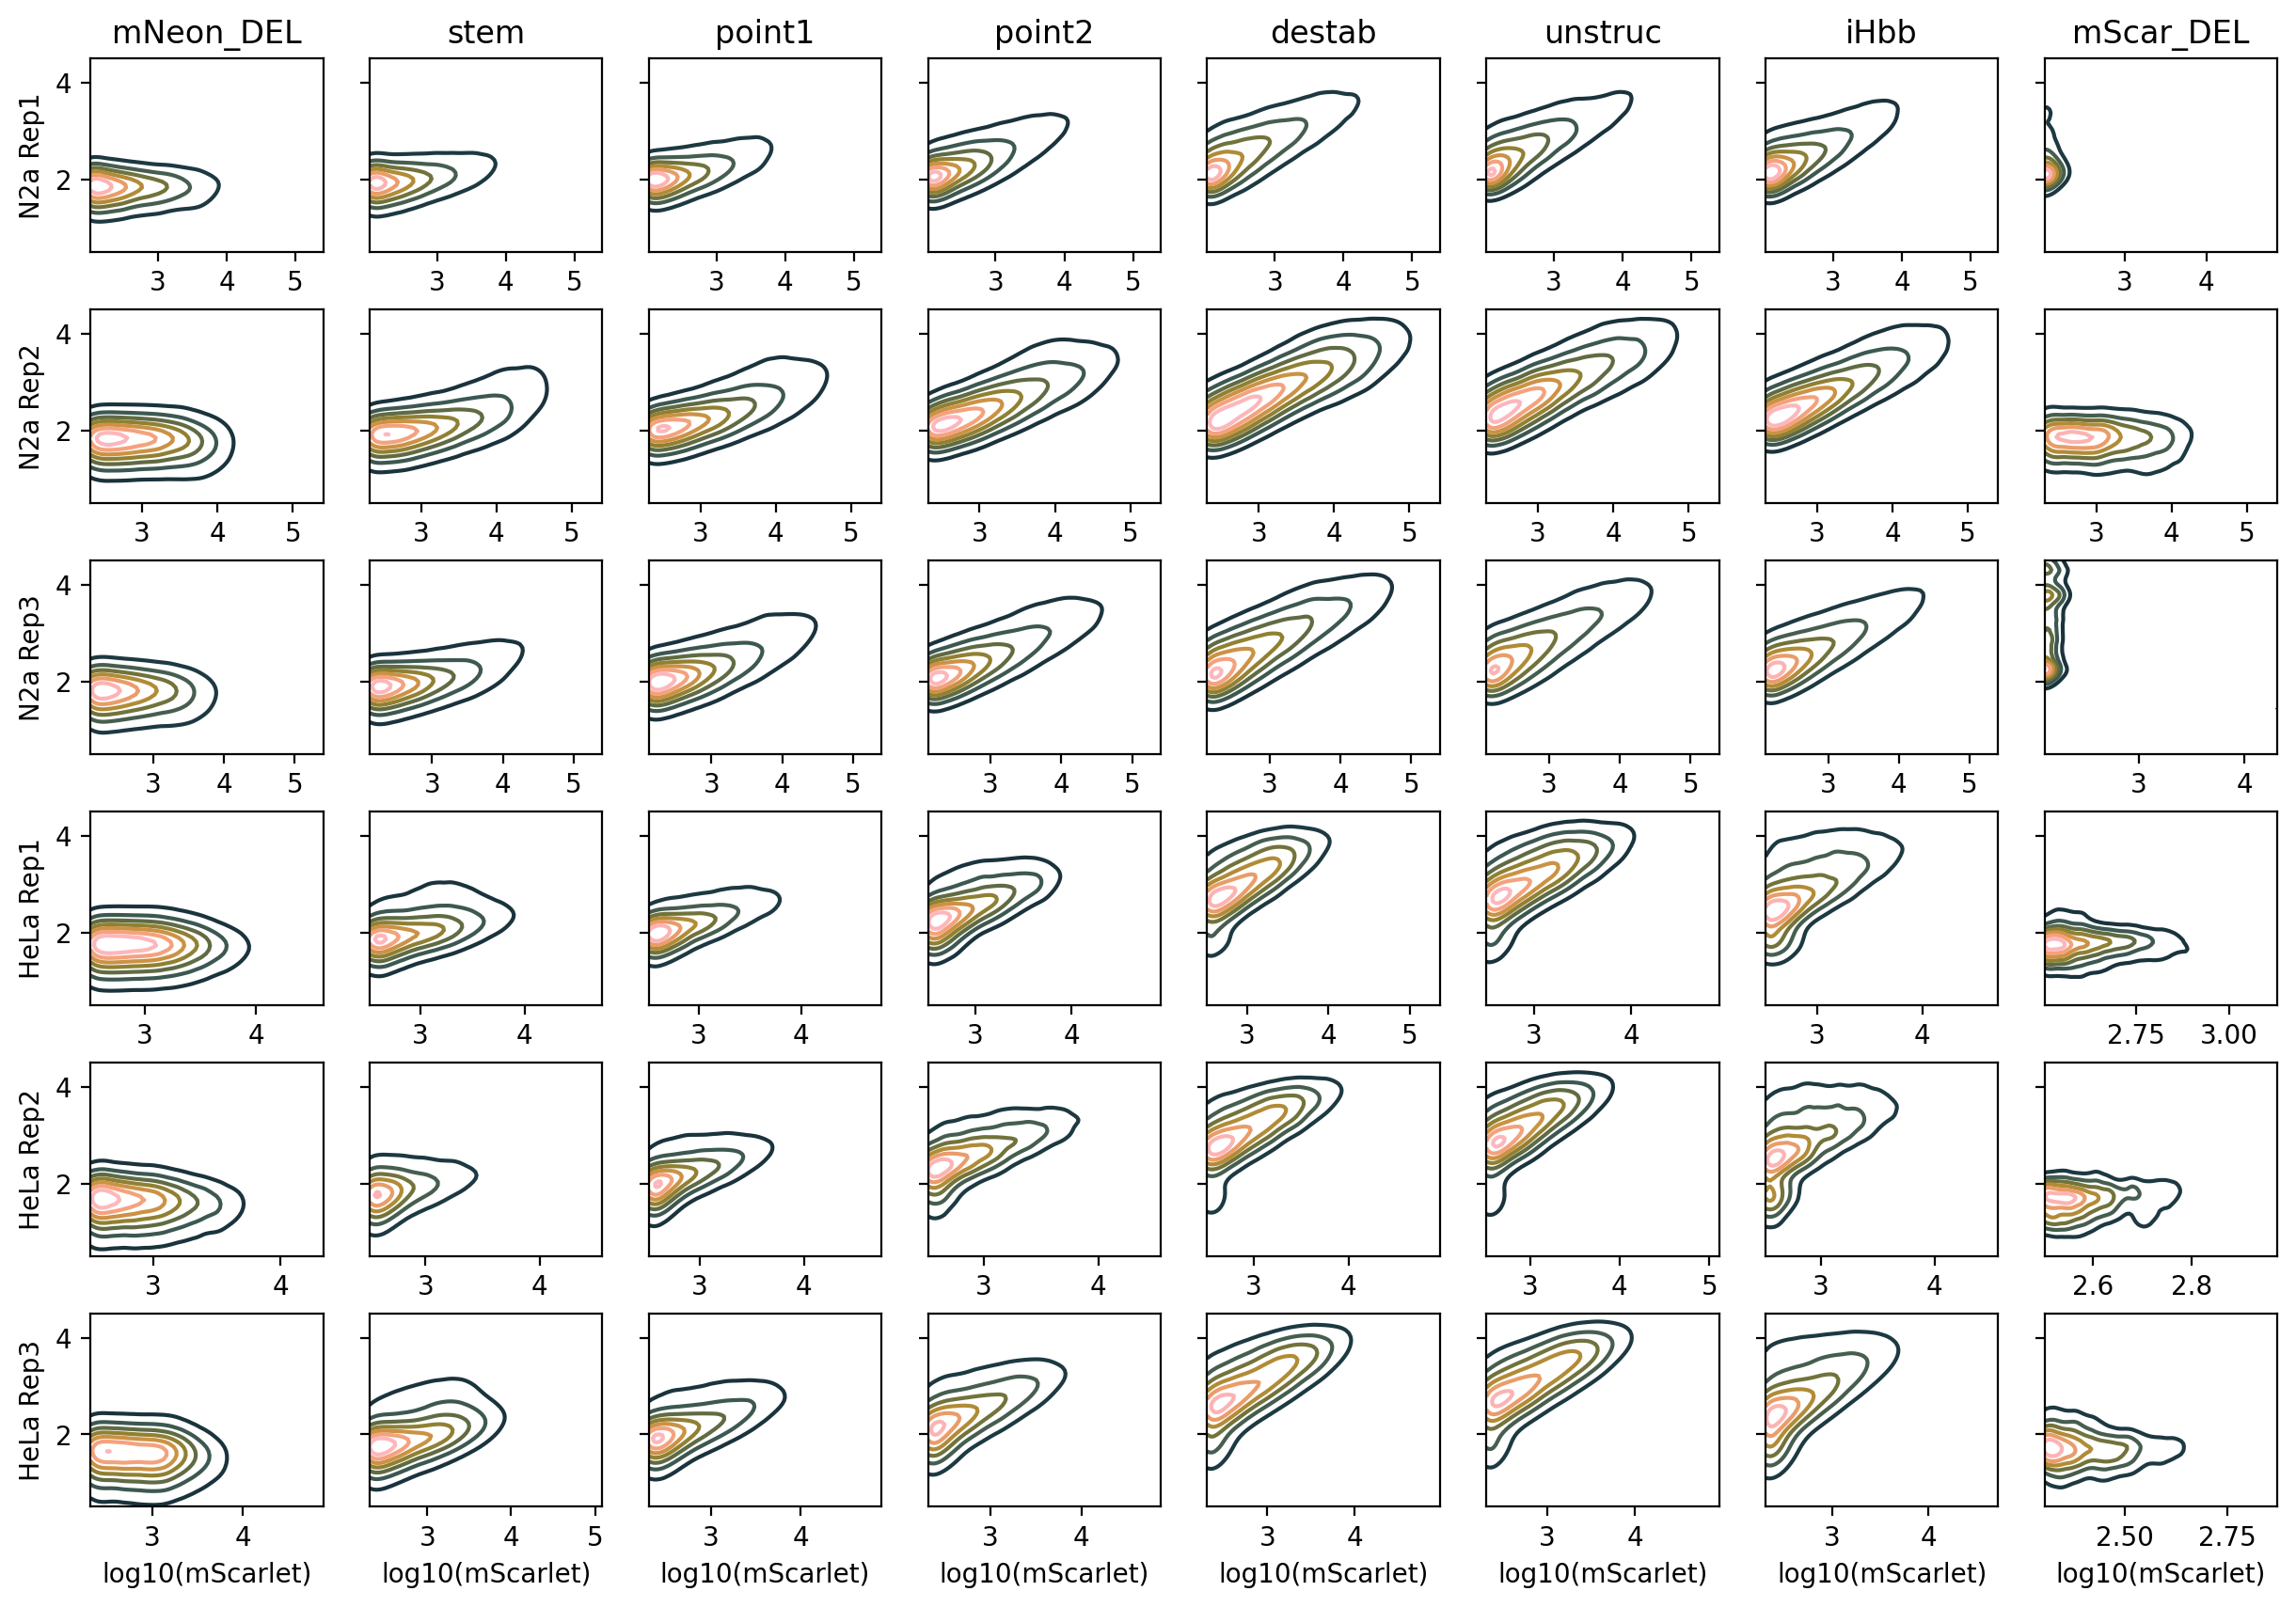

In [9]:
# all scatter plots after filtering

fig, axs = plt.subplots(6, 8, figsize=[15,10], sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.3)
bins = np.arange(-1, 6, 0.05)
mScar_pos = [2.0, 2.3, 2.1, 2.5, 2.5, 2.5]

for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3, HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    for j, smp in enumerate(expt):
        comp_red, comp_gre = apply_comp(expt[smp], comp[i])
        dscatter_contour(comp_red[expt[smp].transf_msk], comp_gre[expt[smp].transf_msk], nbins=[100,100], log=[True, True], ax=axs[i, j], cmap=cmap_sc, alpha=1)

for i, ax in enumerate(axs[0, :]):
    ax.set_title(list(expt.keys())[i])

for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(['N2a Rep1', 'N2a Rep2', 'N2a Rep3', 'HeLa Rep1', 'HeLa Rep2', 'HeLa Rep3'][i])

for i, ax in enumerate(axs[-1, :]):
    ax.set_xlabel('log10(mScarlet)')

plt.setp(axs, yscale='linear', xscale='linear', ylim=[0.5, 4.5])
plt.show()

## Figure 5

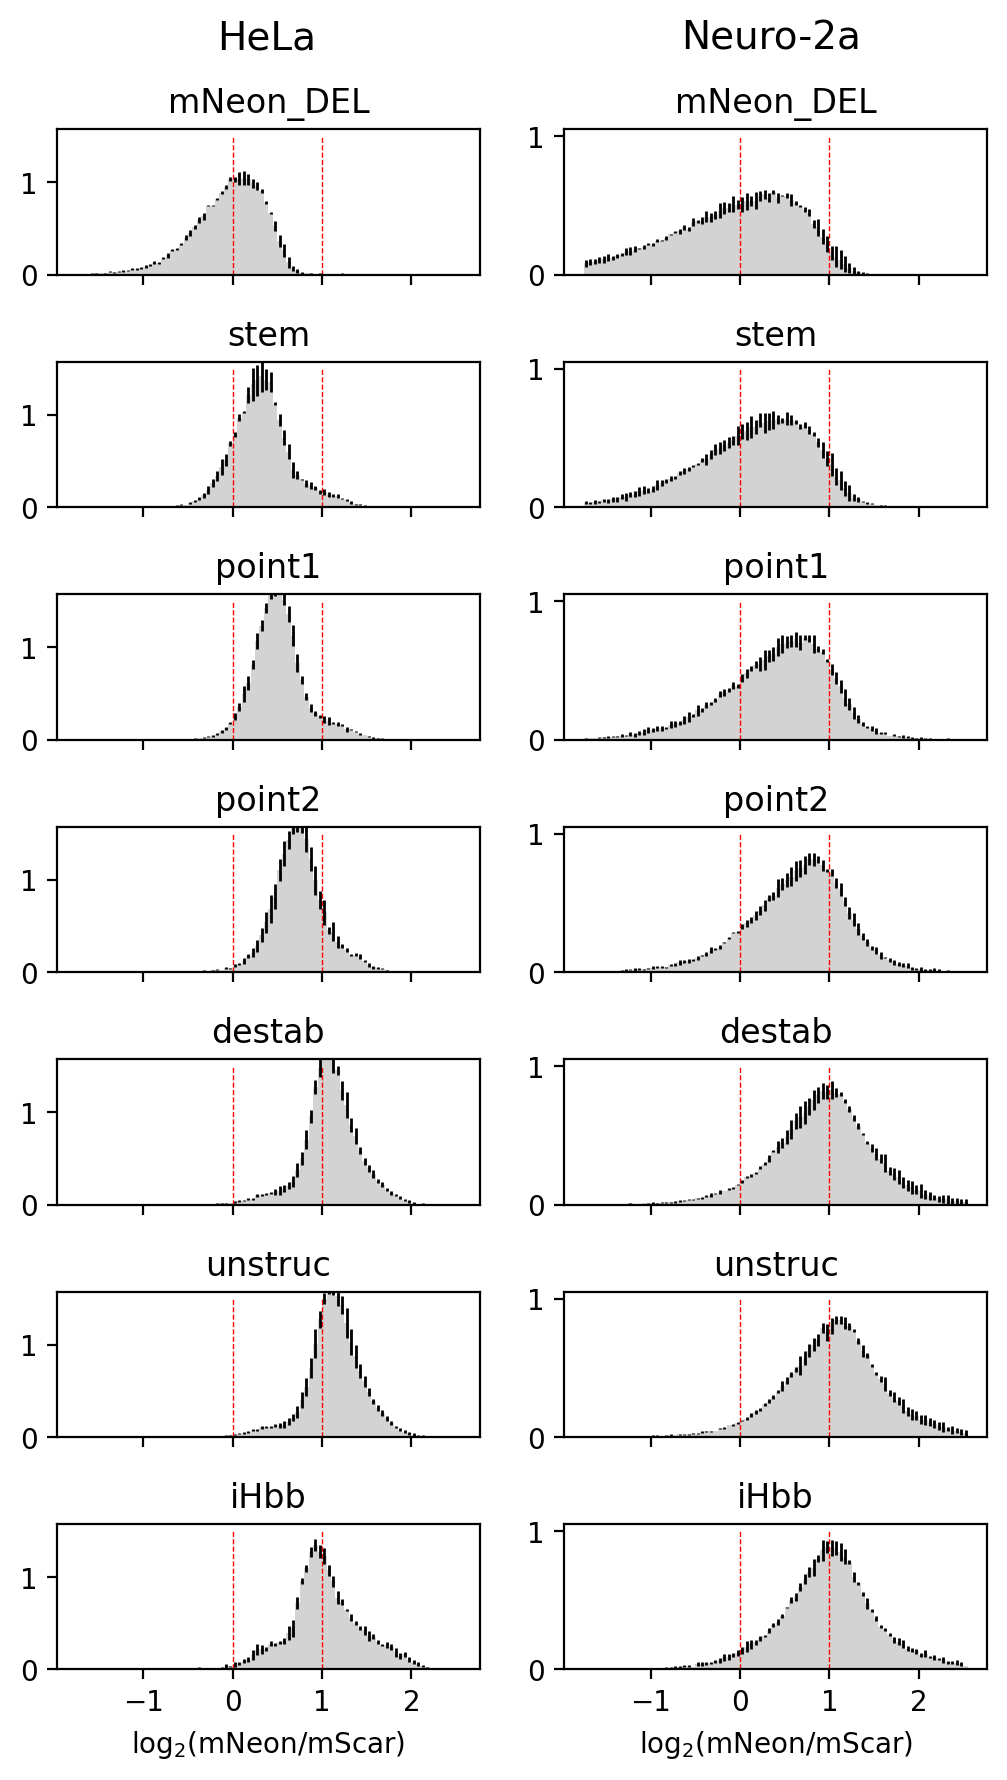

In [10]:
# histogram with errorbars 

# calculate normalization factors
norm_pos = []
for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3, HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    comp_red, comp_gre = apply_comp(expt['iHbb'], comp[i])
    rat = np.log2(comp_gre[expt['iHbb'].transf_msk]/comp_red[expt['iHbb'].transf_msk])
    norm_pos.append(np.median(rat))
norm_neg = []
for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3, HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    comp_red, comp_gre = apply_comp(expt['mNeon_DEL'], comp[i])
    rat = np.log2(comp_gre[expt['mNeon_DEL'].transf_msk]/comp_red[expt['mNeon_DEL'].transf_msk])
    norm_neg.append(np.median(rat))

def get_rate_from_smp(smp, comp=[0,0], norm_neg=0, norm_pos=1):
    comp_red, comp_gre = apply_comp(smp, comp)
    rat = np.log2(comp_gre[smp.transf_msk]/comp_red[smp.transf_msk])
    rat_norm = (rat-norm_neg) / (norm_pos-norm_neg)
    return(rat_norm)

bin_size = 0.05
bins = np.arange(-1.75, 2.6, bin_size)

hela_rat_dict = defaultdict(list)
for i, expt in enumerate([HeLa_rep1, HeLa_rep2, HeLa_rep3]):
    for j, smp in enumerate(expt):
        rat_norm = get_rate_from_smp(expt[smp], comp[i+3], norm_neg[i+3], norm_pos[i+3])
        y, x = np.histogram(rat_norm, bins=bins, density=True)
        hela_rat_dict[smp].append(y)

n2a_rat_dict = defaultdict(list)
for i, expt in enumerate([n2a_rep1, n2a_rep2, n2a_rep3]):
    for j, smp in enumerate(expt):
        rat_norm = get_rate_from_smp(expt[smp], comp[i], norm_neg[i], norm_pos[i])
        y, x = np.histogram(rat_norm, bins=bins, density=True)
        n2a_rat_dict[smp].append(y)

x = x[:-1]+0.5*np.diff(x)[0]
sample_ids = ['mNeon_DEL', 'stem', 'point1', 'point2', 'destab', 'unstruc', 'iHbb']

fig, axs = plt.subplots(len(sample_ids), 2, figsize=[6,10], sharex=True, sharey='col')
plt.subplots_adjust(hspace=0.6)

for i, smp in enumerate(sample_ids):
    axs[i, 0].plot([0, 0], [0, 1.5], '--r', lw=0.5)
    axs[i, 0].plot([1, 1], [0, 1.5], '--r', lw=0.5)
    axs[i, 0].bar(x, np.mean(hela_rat_dict[smp], axis=0), bin_size, color='lightgray')
    axs[i, 0].errorbar(x, np.mean(hela_rat_dict[smp], axis=0), yerr=np.std(hela_rat_dict[smp], axis=0), fmt=' ', ecolor='black', elinewidth=1, capsize=0)
    axs[i, 0].set_title(f"{smp}")
    axs[i, 0].set_ylim(bottom=0)

for i, smp in enumerate(sample_ids):
    axs[i, 1].plot([0, 0], [0, 1], '--r', lw=0.5)
    axs[i, 1].plot([1, 1], [0, 1], '--r', lw=0.5)
    axs[i, 1].bar(x, np.mean(n2a_rat_dict[smp], axis=0), bin_size, color='lightgray')
    axs[i, 1].errorbar(x, np.mean(n2a_rat_dict[smp], axis=0), yerr=np.std(n2a_rat_dict[smp], axis=0), fmt=' ', ecolor='black', elinewidth=1, capsize=0)
    axs[i, 1].set_title(f"{smp}")
    axs[i, 1].set_ylim(bottom=0)

axs[-1, 0].set_xlabel("log$_2$(mNeon/mScar)")
axs[-1, 1].set_xlabel("log$_2$(mNeon/mScar)")
fig.text(0.30, 0.92, 'HeLa', ha='center', fontsize=14)
fig.text(0.72, 0.92, 'Neuro-2a', ha='center', fontsize=14)

plt.show()

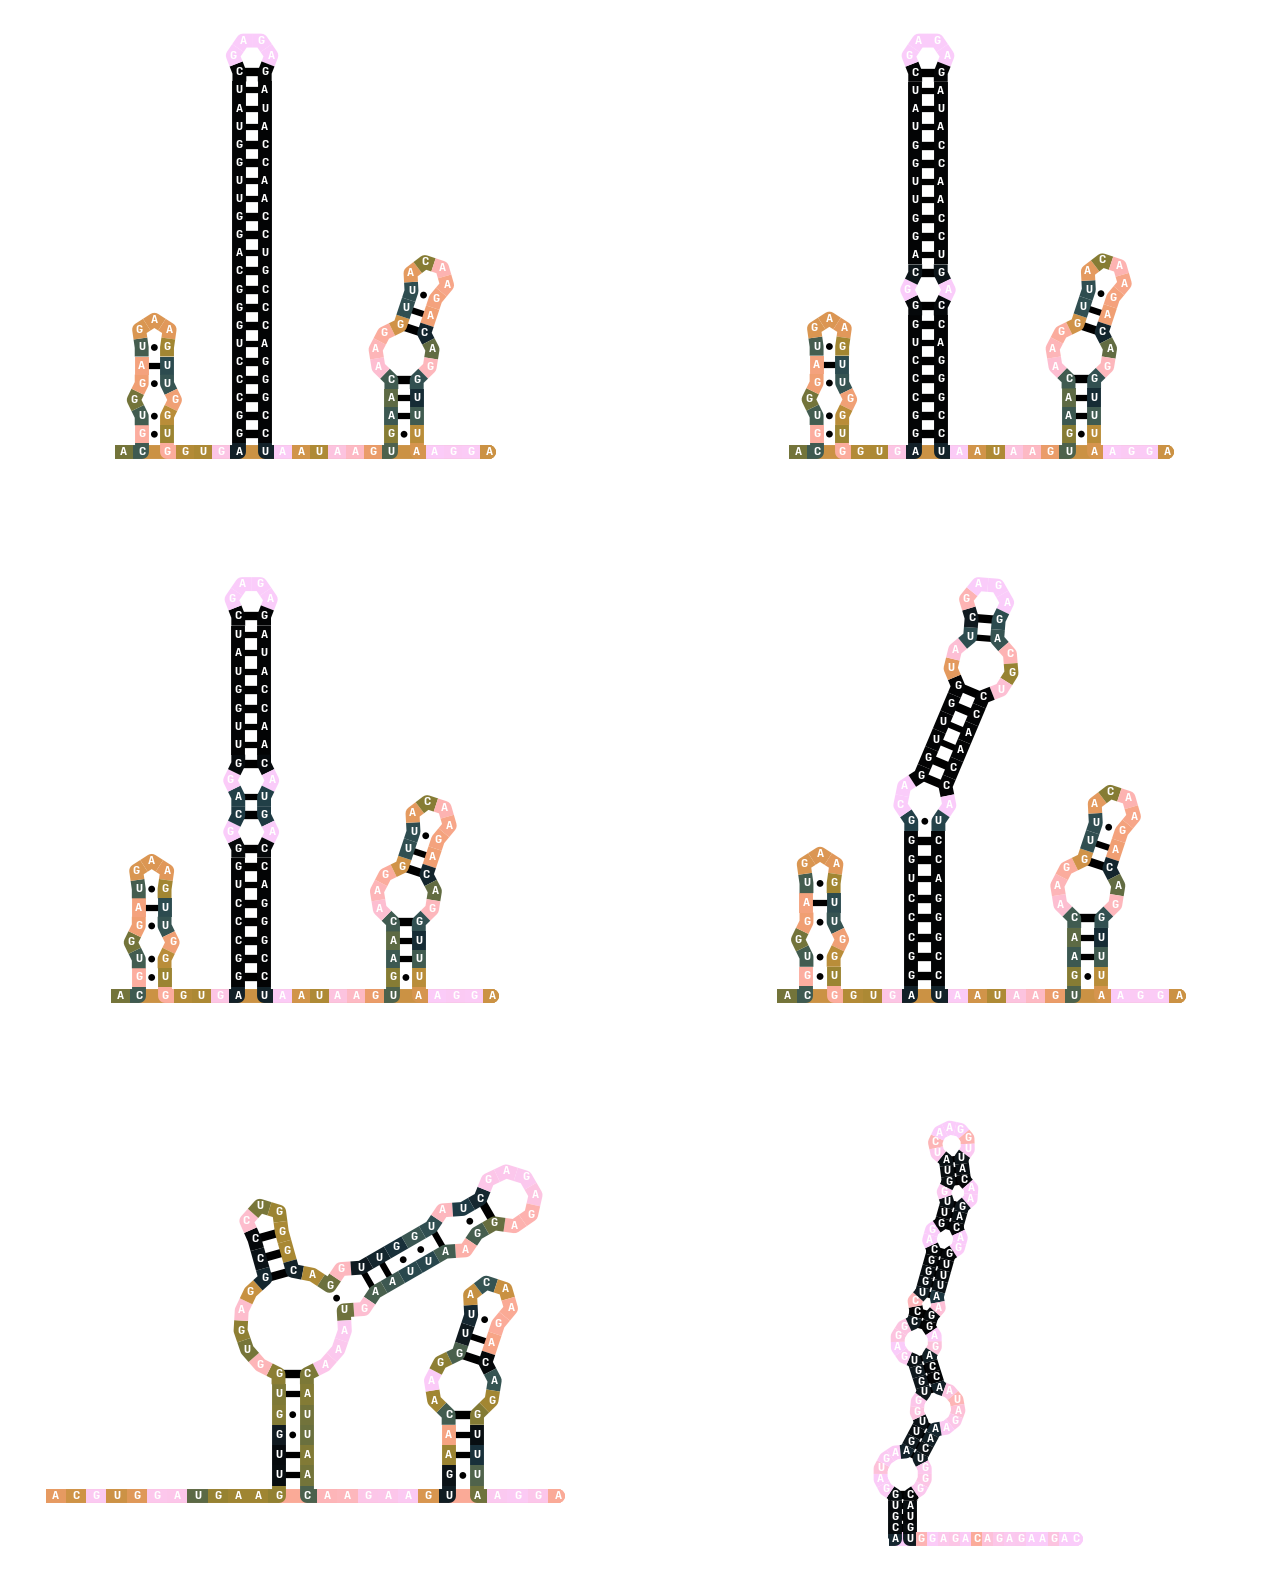

In [11]:
sv = ['GUUGGUAUCGAGAGAUACCAACCUGCCCAGGGCCUAAUAAGUGAACAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG',
      'GUUGGUAUCGAGAGAUACCAACCUGACCAGGGCCUAAUAAGUGAACAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG',
      'GUUGGUAUCGAGAGAUACCAACAUGACCAGGGCCUAAUAAGUGAACAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG',
      'GUUGGUAUCGAGAGACGUCCAACCAUCCAGGGCCUAAUAAGUGAACAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG',
      'GUUGGUAUCGAGAGAGGAAUUAAGUAAACAUUAACAAGAAGUGAACAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG',
      'GUUGGUAUCAAGGUUACAAGACAGGUUUAAGGAGACCAAUAGAAACUGGGCAUGUGGAGACAGAGAAGACUCUUGGGUUUCUGAUAGGCACUGACUCUCUCUGCCUAUUGGUCUAUUUUCCCACCCUUAG']

e1 = 'AUGGUGCAUCUGACUCCUGAGGAGAAGUCUGCCGUUACUGCCCUGUGGGGCAAGGUGAACGUGGAUGAAGUUGGUGGUGAGGCCCUGGGCAG'
bpp_sel, _, _, dbr_sel, _, dbr_efe_sel, efe_sel, _, _, _ = get_all_metrics([e1[-35:] + i[:71] for i in sv], n_cpu=4)

fig, axs = plt.subplots(3, 2, figsize=[8, 10])#, sharex=True, sharey=True)
axs = axs.flatten()
cmap = Colormap('batlowk_r').to_mpl()

for i, _ in enumerate(sv):
    
    seq_plot = e1[-35:] + sv[i][:71]
    m = plot_structure(seq_plot, dbr_sel[i], bpp_sel[i], np.array([True]*len(seq_plot)), axs=axs[i], cmap=cmap, line_width=5, bp_width=3, text_size=4, vmin=0, vmax=1)
    
plt.show()
